# F1 Canadian Grand Prix June 2024 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

#

## Driver Position Lap By Lap 

In [2]:
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\DATA\DRIVER LAP POSITOIN.csv")

In [3]:
df.columns = df.columns.str.strip()
df.head()

,Sl no.,Driver Name,Team Name,Qualifying Lap Time,Grid Position,L1,L2,L3,L4,L5,...,L62,L63,L64,L65,L66,L67,L68,L69,L70,FINISHED
0,1,George Russell,Mercedes,01:11.0,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Max Verstappen,Red Bull Racing Honda RBPT,01:11.1,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,Oscar Piastri,McLaren Mercedes,01:11.1,3,4,4,4,4,4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,Kimi Antonelli,Mercedes,01:11.4,4,3,3,3,3,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,5,Lewis Hamilton,Ferrari,01:11.5,5,5,5,5,5,5,...,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0


In [4]:
grid_position_driver = df['Driver Name'].to_list()
grid_no = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

team_colors = {
    'Mercedes': '#00D2BE',
    'Red Bull Racing Honda RBPT': '#1E41FF',
    'Ferrari': '#DC0000',
    'McLaren Mercedes': '#FF8000',
    'Aston Martin Aramco Mercedes': '#006F62',
    'Alpine Renault': '#0090FF',
    'Williams Mercedes': '#005AFF',
    'Kick Sauber Ferrari': '#52E252',
    'Haas Ferrari': '#B6BABD',
    'Racing Bulls Honda RBPT': '#6692FF'
}

driver_teams = df.set_index('Driver Name')['Team  Name'].str.strip().to_dict()

lap_data = {}

for _, row in df.iterrows():
    driver = row['Driver Name'].strip()  # clean name
    laps = row.iloc[4:].dropna().astype(int).tolist()  # get lap positions
    lap_data[driver] = laps

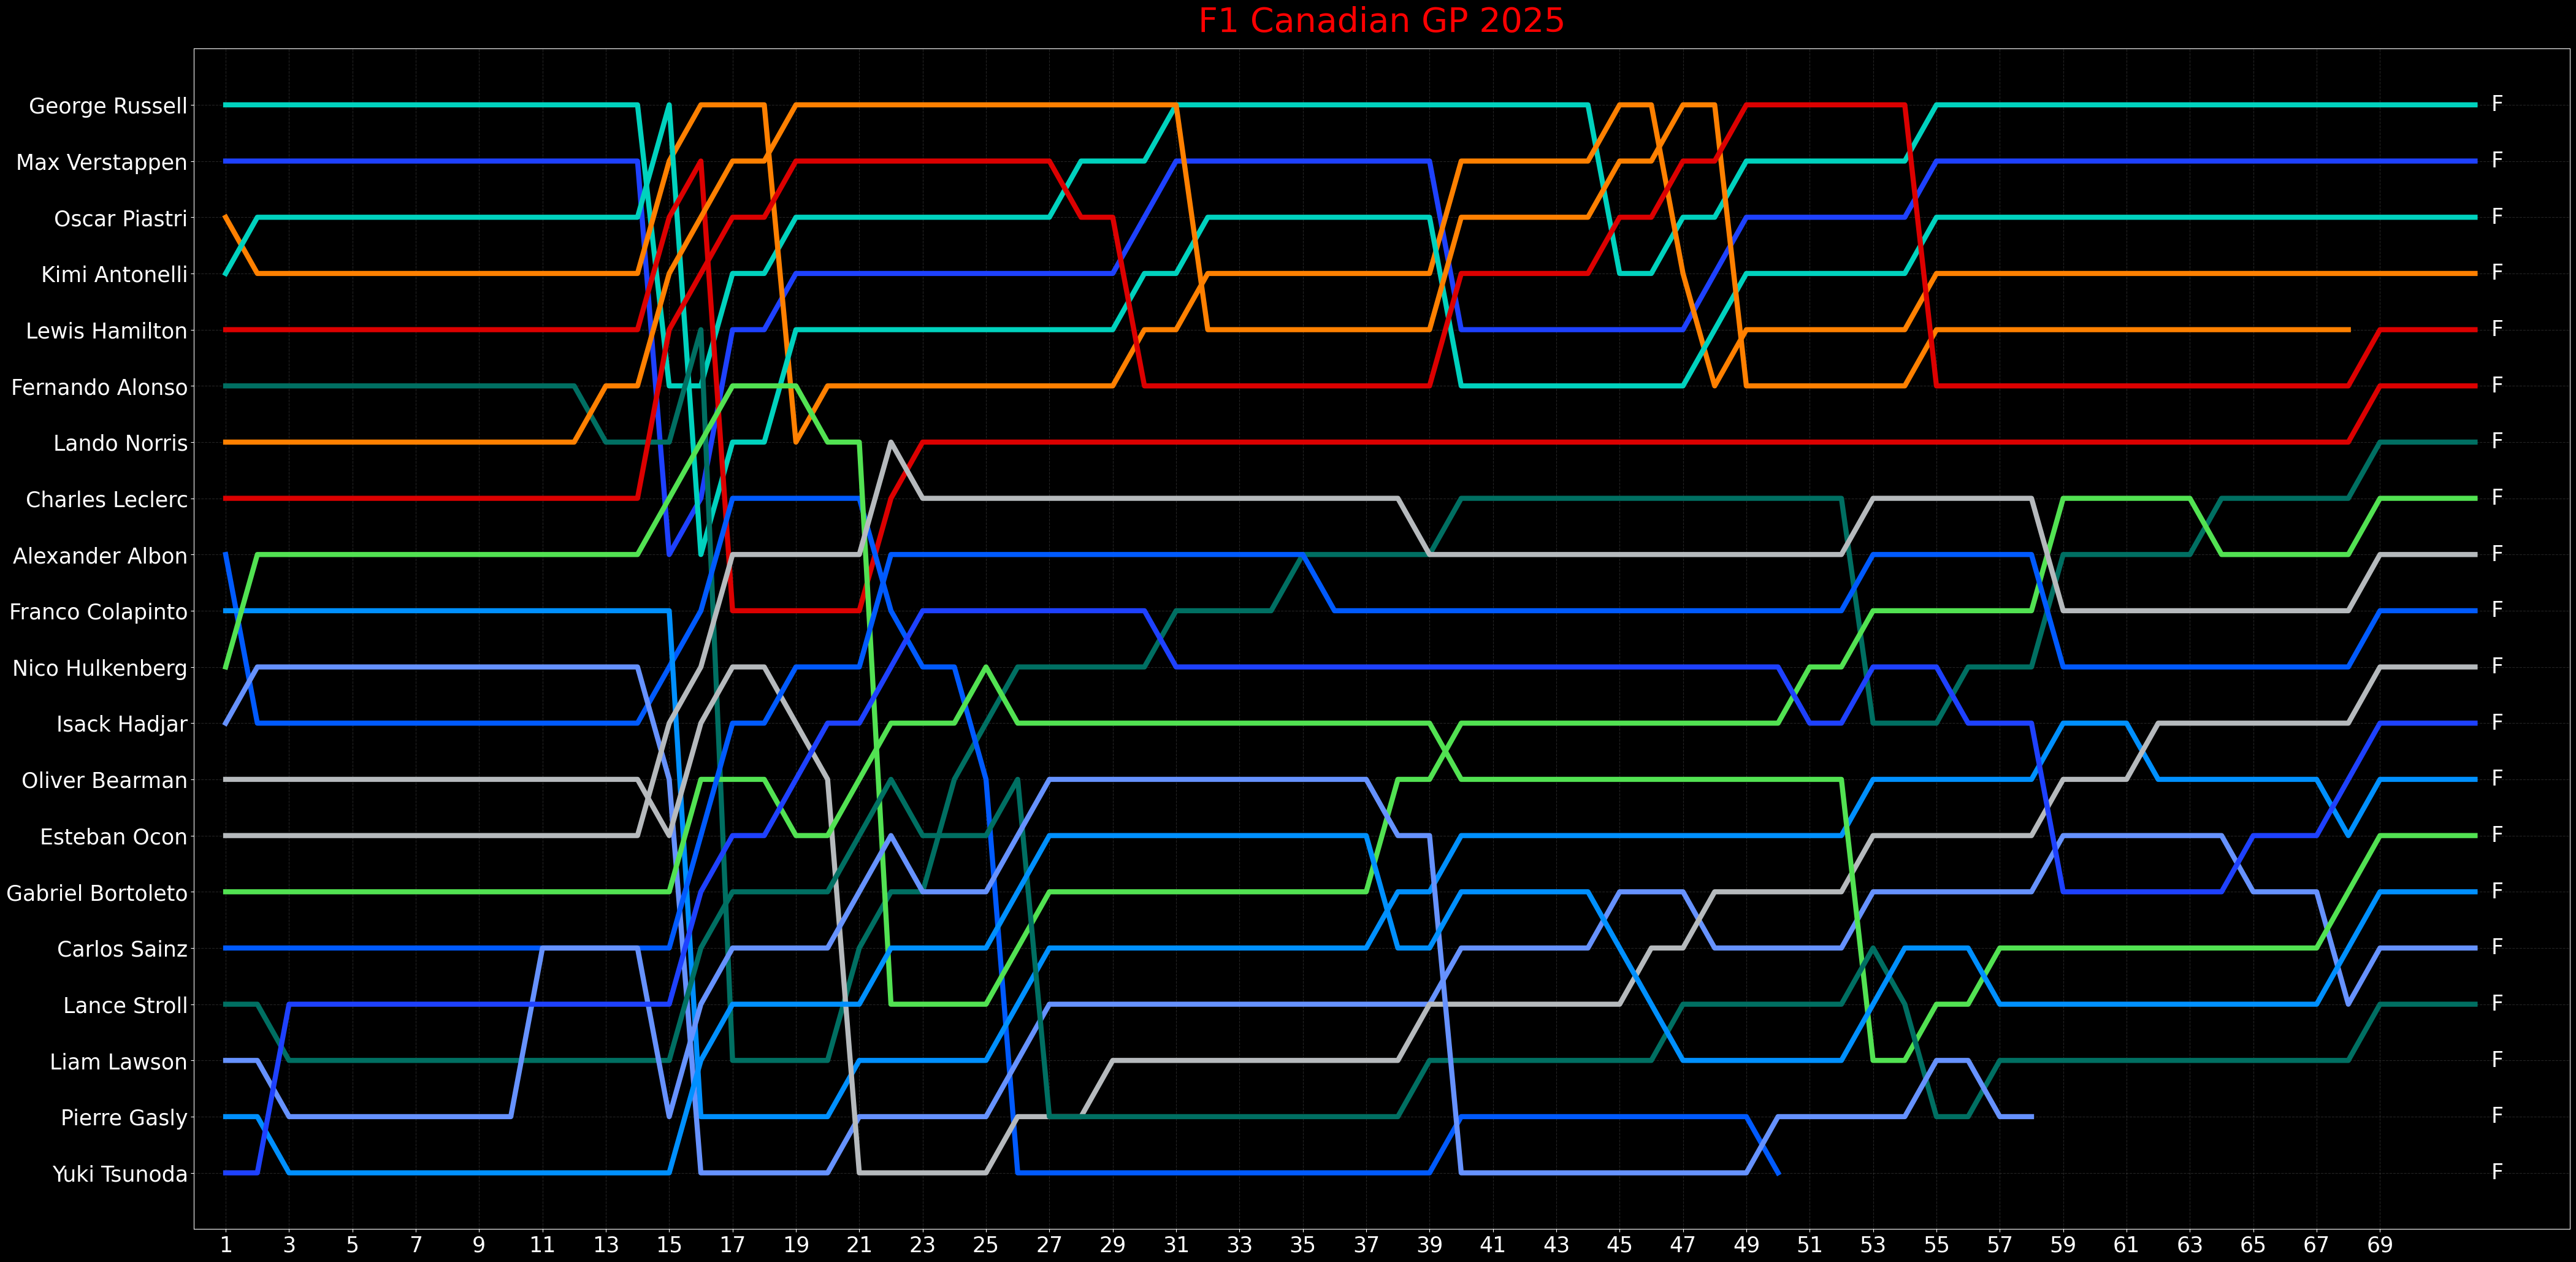

In [5]:
fig, ax = plt.subplots(figsize=(50, 25))

# Set the background color of the entire figure canvas to black.
fig.patch.set_facecolor('black')    # .patch is the rectangle that is the background of the figure.
                                  
# Set plot (axes) background color to black
ax.set_facecolor('black')

# Set axis labels and tick color to white
ax.tick_params(colors='white')         # .tick_params(...)	Customizes tick appearance
ax.xaxis.label.set_color('white')      # X-axis label color
ax.yaxis.label.set_color('white')      # ax, the plot area (Axes object)
ax.title.set_color('white')

# Make the axis color white
for spine in ax.spines.values():       # It changes the color of all four border lines (called spines) around your plot to white.
    spine.set_color('white')

# Plots the graph of lap times
for driver, laps in lap_data.items():
    team = driver_teams[driver]
    color = team_colors.get(team, 'white')  # default to white if team not found
    ax.plot(range(1, len(laps)+1), laps, linewidth=6, color=color, label=driver)

    
ax.set_xlim(0, 75)
ax.set_ylim(0, 21)

plt.xticks(range(1,71,2), fontsize = 25)
plt.yticks(range(1,21), fontsize = 20)

ax.set_yticklabels(grid_position_driver, fontsize = 25)
ax.grid(True, linestyle='--', alpha=0.2)

for grid in grid_no:
    ax.text(72.5, grid, 'F', fontsize=25, color='white',ha='left', va='center')

ax.invert_yaxis()

plt.title('F1 Canadian GP 2025', fontsize = 40, color = 'r', pad=20)
plt.show()

### Position Gained/Loss

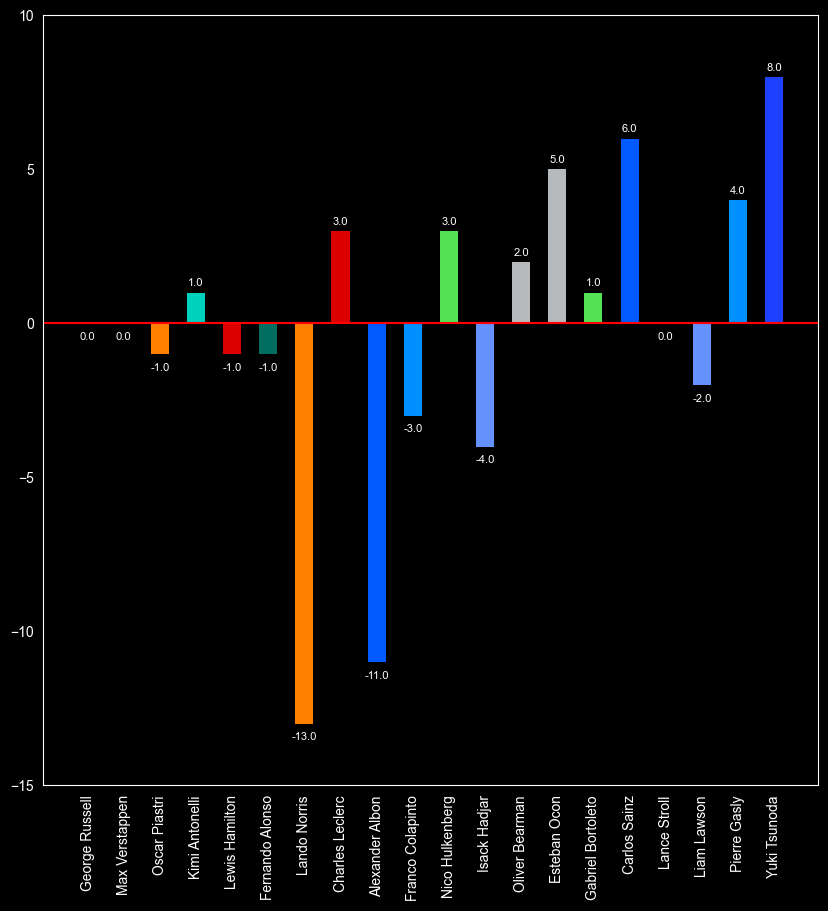

In [6]:
import matplotlib.font_manager as fm

font_name = 'Arial'
font_file = r"C:\Users\LENOVO\Downloads\Arial Font\ARIAL.TTF"

# Register the font with matplotlib
fm.fontManager.addfont(font_file)

df['FINISHED'] = df['FINISHED'].fillna(20)
df['Gain/Loss'] = df['Grid Position'] - df['FINISHED']

fig, ax = plt.subplots(figsize=(10,10))

fig.set_facecolor('black')

ax.set_facecolor('black')

for spine in ax.spines.values():
    spine.set_color('white')

for driver, team in driver_teams.items():
    color = team_colors.get(team, 'white')  # default to white if team not found
    ax.bar(
    x = driver,
    height = df['Gain/Loss'][df['Driver Name'] == driver],
    color = color,
    width = 0.5
)
    
for driver in df['Driver Name']:
    height = df.loc[df['Driver Name'] == driver, 'Gain/Loss'].values[0]
    if height > 0:
        ax.text(
            driver, 
            height + 0.3, 
            str(height),
            color = 'white', 
            fontsize = 8,
            fontname = font_name, 
            ha = 'center', 
            va = 'center'
        )
    else:
        ax.text(
            driver, 
            height - 0.6, 
            str(height),
            color = 'white', 
            fontsize = 8, 
            fontname = font_name,
            ha = 'center', 
            va = 'bottom'
        )

plt.ylim((-15, 10))

plt.yticks(color = 'white', fontsize = 10, fontname = font_name)
plt.xticks(rotation=90, color = 'white', fontsize = 10, fontname = font_name)


ax.axhline(y=0, color='red', linestyle='-')
plt.show()

#

# More Detail Analysis

In [8]:
import fastf1

# Enable FastF1 cache
fastf1.Cache.enable_cache(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\cache")

# Load session
session = fastf1.get_session(2025, 'canada', 'R')  
session.load()

# Get the laps data
df = session.laps

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']


#

### Race Strategy For Max Verstappen

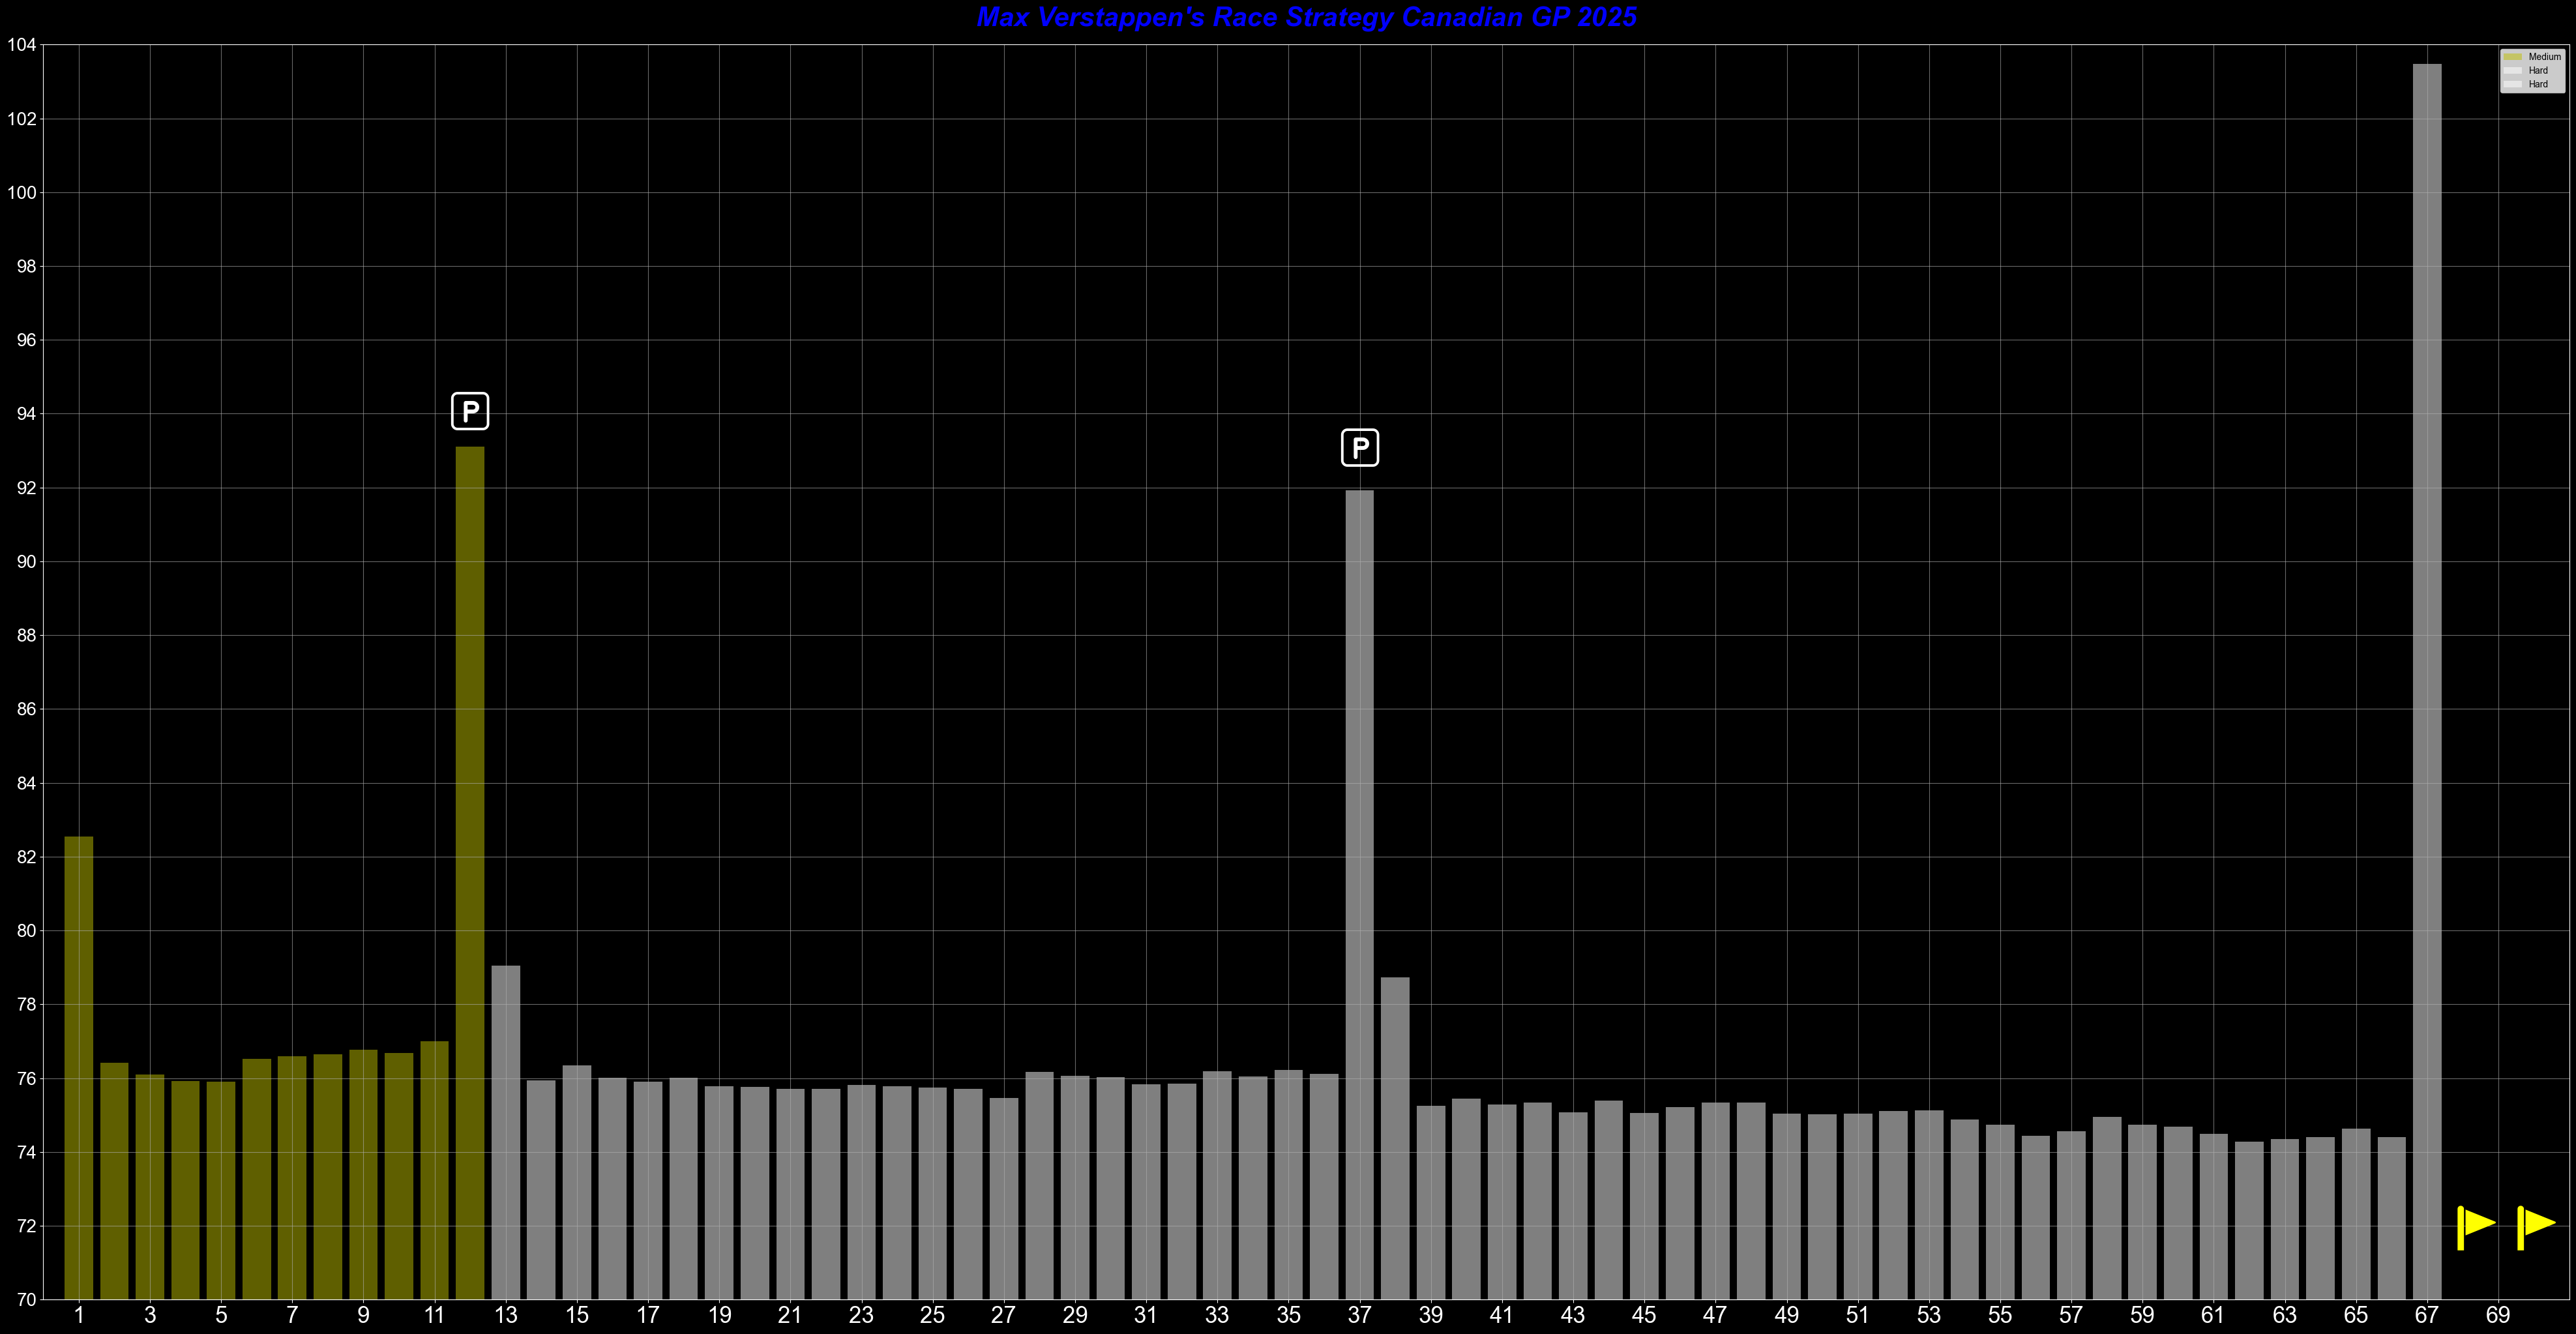

In [9]:
import emoji 

# Creating new verstappen dataframe
df['seconds'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()
verstappen = df[df['Driver'] == 'VER']
 
fig, ax = plt.subplots(figsize=(50, 25))

# Bring Font
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.rcParams['font.family'] = 'Arial'

# Set the background color of the entire figure canvas to black.
fig.set_facecolor('black')
ax.set_facecolor('black')

# Make the axis color white
for spine in ax.spines.values():
    spine.set_color('white')

ax.tick_params(axis='both', colors='white')
# Plot the bars 
ax.bar(verstappen[verstappen['Stint'] == 1]['LapNumber'], verstappen[verstappen['Stint'] == 1]['seconds'], label = 'Medium', color='y', alpha = 0.5)
ax.bar(verstappen[verstappen['Stint'] == 2]['LapNumber'], verstappen[verstappen['Stint'] == 2]['seconds'], label = 'Hard', color='#FFFFFF', alpha = 0.5)
ax.bar(verstappen[verstappen['Stint'] == 3]['LapNumber'], verstappen[verstappen['Stint'] == 3]['seconds'], label = 'Hard',color='#FFFFFF', alpha = 0.5) 

# Text Emoji
plt.text(67.5, 71.5, "🚩", fontsize=50, font = 'Segoe UI Emoji', color = 'yellow')
plt.text(69.2, 71.5, "🚩", fontsize=50, font = 'Segoe UI Emoji', color = 'yellow')
plt.text(12.7, 93.5, "🅿️", fontsize=40, font = 'Segoe UI Emoji', color = 'white', ha ='center', va='bottom')
plt.text(37.7, 92.5, "🅿️", fontsize=40, font = 'Segoe UI Emoji', color = 'white', ha ='center', va='bottom')

plt.xlim(0,71)
plt.ylim(70,100)

plt.xticks(range(1,71,2), font='Arial', fontsize = 25)
plt.yticks(range(70,105,2),font='Arial', fontsize = 20)

ax.grid(True, linestyle='-', alpha=0.6)

plt.title("Max Verstappen's Race Strategy Canadian GP 2025",font = 'Arial', fontweight = 'bold' , fontstyle='italic', fontsize = 30, color = 'blue', pad=20)

plt.legend(fontsize=100, prop={'family': 'Arial'})
plt.show()


In [10]:
# Analysis 

ver_race_pace = verstappen.drop(verstappen[verstappen['seconds'] > 80].index)
avg_race_pace = ver_race_pace['seconds'].mean()
print(f"The average race pace of Max Verstappen is {avg_race_pace:.2f} seconds.")

avg_race_pace_med = ver_race_pace[ver_race_pace['Compound'] == 'MEDIUM']['seconds'].mean()
start_tyre_age_med = int(ver_race_pace[ver_race_pace['Compound'] == 'MEDIUM']['TyreLife'].min())
end_tyre_age_med = int(ver_race_pace[ver_race_pace['Compound'] == 'MEDIUM']['TyreLife'].max())
print(f"Average lap time in medium comound tyres is {avg_race_pace_med:.2f} seconds. Tyre age : ( {start_tyre_age_med} - {end_tyre_age_med} )")

avg_race_pace_hard_1 = ver_race_pace[ver_race_pace['Compound'] == 'HARD']['seconds'].mean()
start_tyre_age_hard_1 = int(ver_race_pace[(ver_race_pace['Compound'] == 'HARD') & (ver_race_pace['LapNumber'] < 37)]['TyreLife'].min())
end_tyre_age_hard_1 = int(ver_race_pace[(ver_race_pace['Compound'] == 'HARD') & (ver_race_pace['LapNumber'] < 37)]['TyreLife'].max())
print(f"Average lap time in hard - 1 comound tyres is {avg_race_pace_hard_1:.2f} seconds. Tyre age : ( {start_tyre_age_hard_1} - {end_tyre_age_hard_1} )")

avg_race_pace_hard_2 = ver_race_pace[
    (ver_race_pace['Compound'] == 'HARD') & 
    (ver_race_pace['LapNumber'] > 37) &
        (ver_race_pace['LapNumber'] < 67)
        ]['seconds'].mean()

start_tyre_age_hard_2 = int(
    ver_race_pace[
        (ver_race_pace['Compound'] == 'HARD') & 
        (ver_race_pace['LapNumber'] > 37) &
        (ver_race_pace['LapNumber'] < 67)
    ]['TyreLife'].min()
)
end_tyre_age_hard_2 = int(
    ver_race_pace[
        (ver_race_pace['Compound'] == 'HARD') &
        (ver_race_pace['LapNumber'] > 37) &
        (ver_race_pace['LapNumber'] < 67)
    ]['TyreLife'].max()
)
print(f"Average lap time in hard - 2 comound tyres is {avg_race_pace_hard_2:.2f} seconds. Tyre age : ( {start_tyre_age_hard_2} - {end_tyre_age_hard_2} )")


The average race pace of Max Verstappen is 75.65 seconds.
Average lap time in medium comound tyres is 76.45 seconds. Tyre age : ( 5 - 14 )
Average lap time in hard - 1 comound tyres is 75.50 seconds. Tyre age : ( 1 - 24 )
Average lap time in hard - 2 comound tyres is 75.05 seconds. Tyre age : ( 1 - 29 )


### Max Verstappen's speed at the end of each sector.

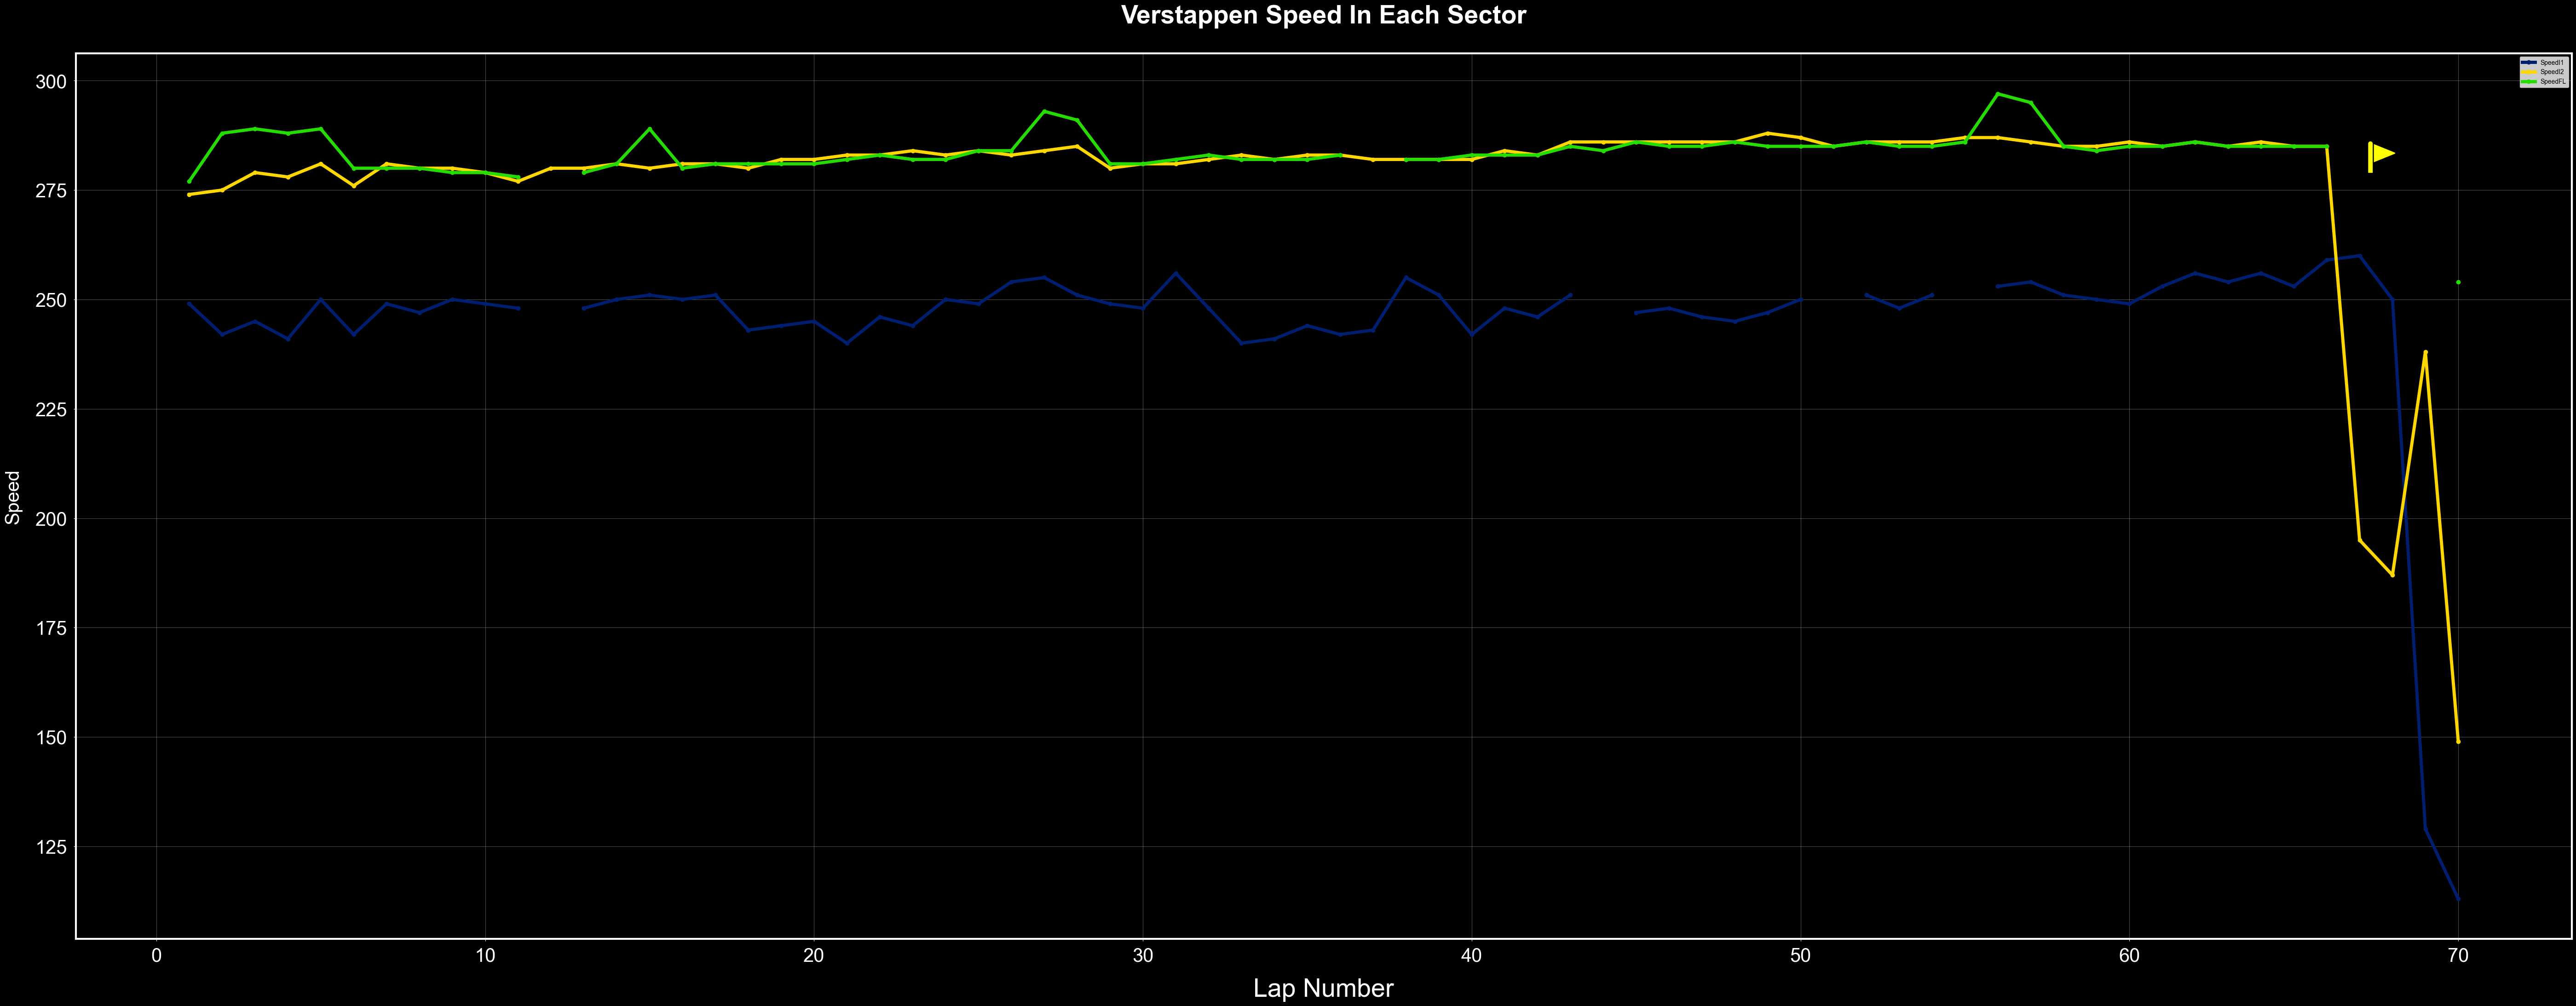

In [11]:
import emoji 
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(figsize=(70, 25))

fig.set_facecolor('black')
ax.set_facecolor('black')

for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_linewidth(3)


       
ax.tick_params(axis='both', colors='white', labelsize=30, pad=10)

ax.plot(verstappen['LapNumber'], verstappen['SpeedI1'], label='SpeedI1', color="#001E6F", marker='o', linewidth=5)
ax.plot(verstappen['LapNumber'], verstappen['SpeedI2'], label='SpeedI2', color="#FFD700", marker='o', linewidth=5)
ax.plot(verstappen['LapNumber'], verstappen['SpeedFL'], label='SpeedFL', color="#25DC00", marker='o', linewidth=5)

plt.text(67, 280, "🚩", fontsize=50, font = 'Segoe UI Emoji', color = 'yellow')

plt.xlabel("Lap Number", font='Arial', fontsize = 40, color = 'white', fontname='Arial', labelpad=20)
plt.ylabel("Speed", fontname='Arial', fontsize = 30, color = 'white', labelpad=20)
plt.title('Verstappen Speed In Each Sector', fontweight='bold', fontname = 'Arial', fontsize = 40, color = 'white', pad=40, ha='center', va='bottom' )

plt.grid(True, linestyle='-', alpha=0.44)
plt.legend(fontsize=50, prop={'family': 'Arial'}, loc='upper right')
plt.show()

# 


## Max Verstappen V/S George Russell Qualifying Lap

### Run this command at first 

In [16]:
import fastf1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.font_manager as fm
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import FancyBboxPatch
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

fastf1.Cache.enable_cache(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\cache")
quali_session = fastf1.get_session(2025, 'canada', 'Q')
quali_session.load()


# Adding Font 
font_bold = fm.FontProperties(
    fname=r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\F1 Font\Formula1-Bold_web_0.ttf", 
    size = 12 
)
font = fm.FontProperties(
    fname=r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\F1 Font\Formula1-Regular_web_0.ttf",
    size = 12
)

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '81', '12', '44', '14', '4', '16', '6', '23', '22', '43', '27', '87', '31', '5', '55', '18', '30', '10']


#

> Qualifying Comparison 

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19576\2682626472.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


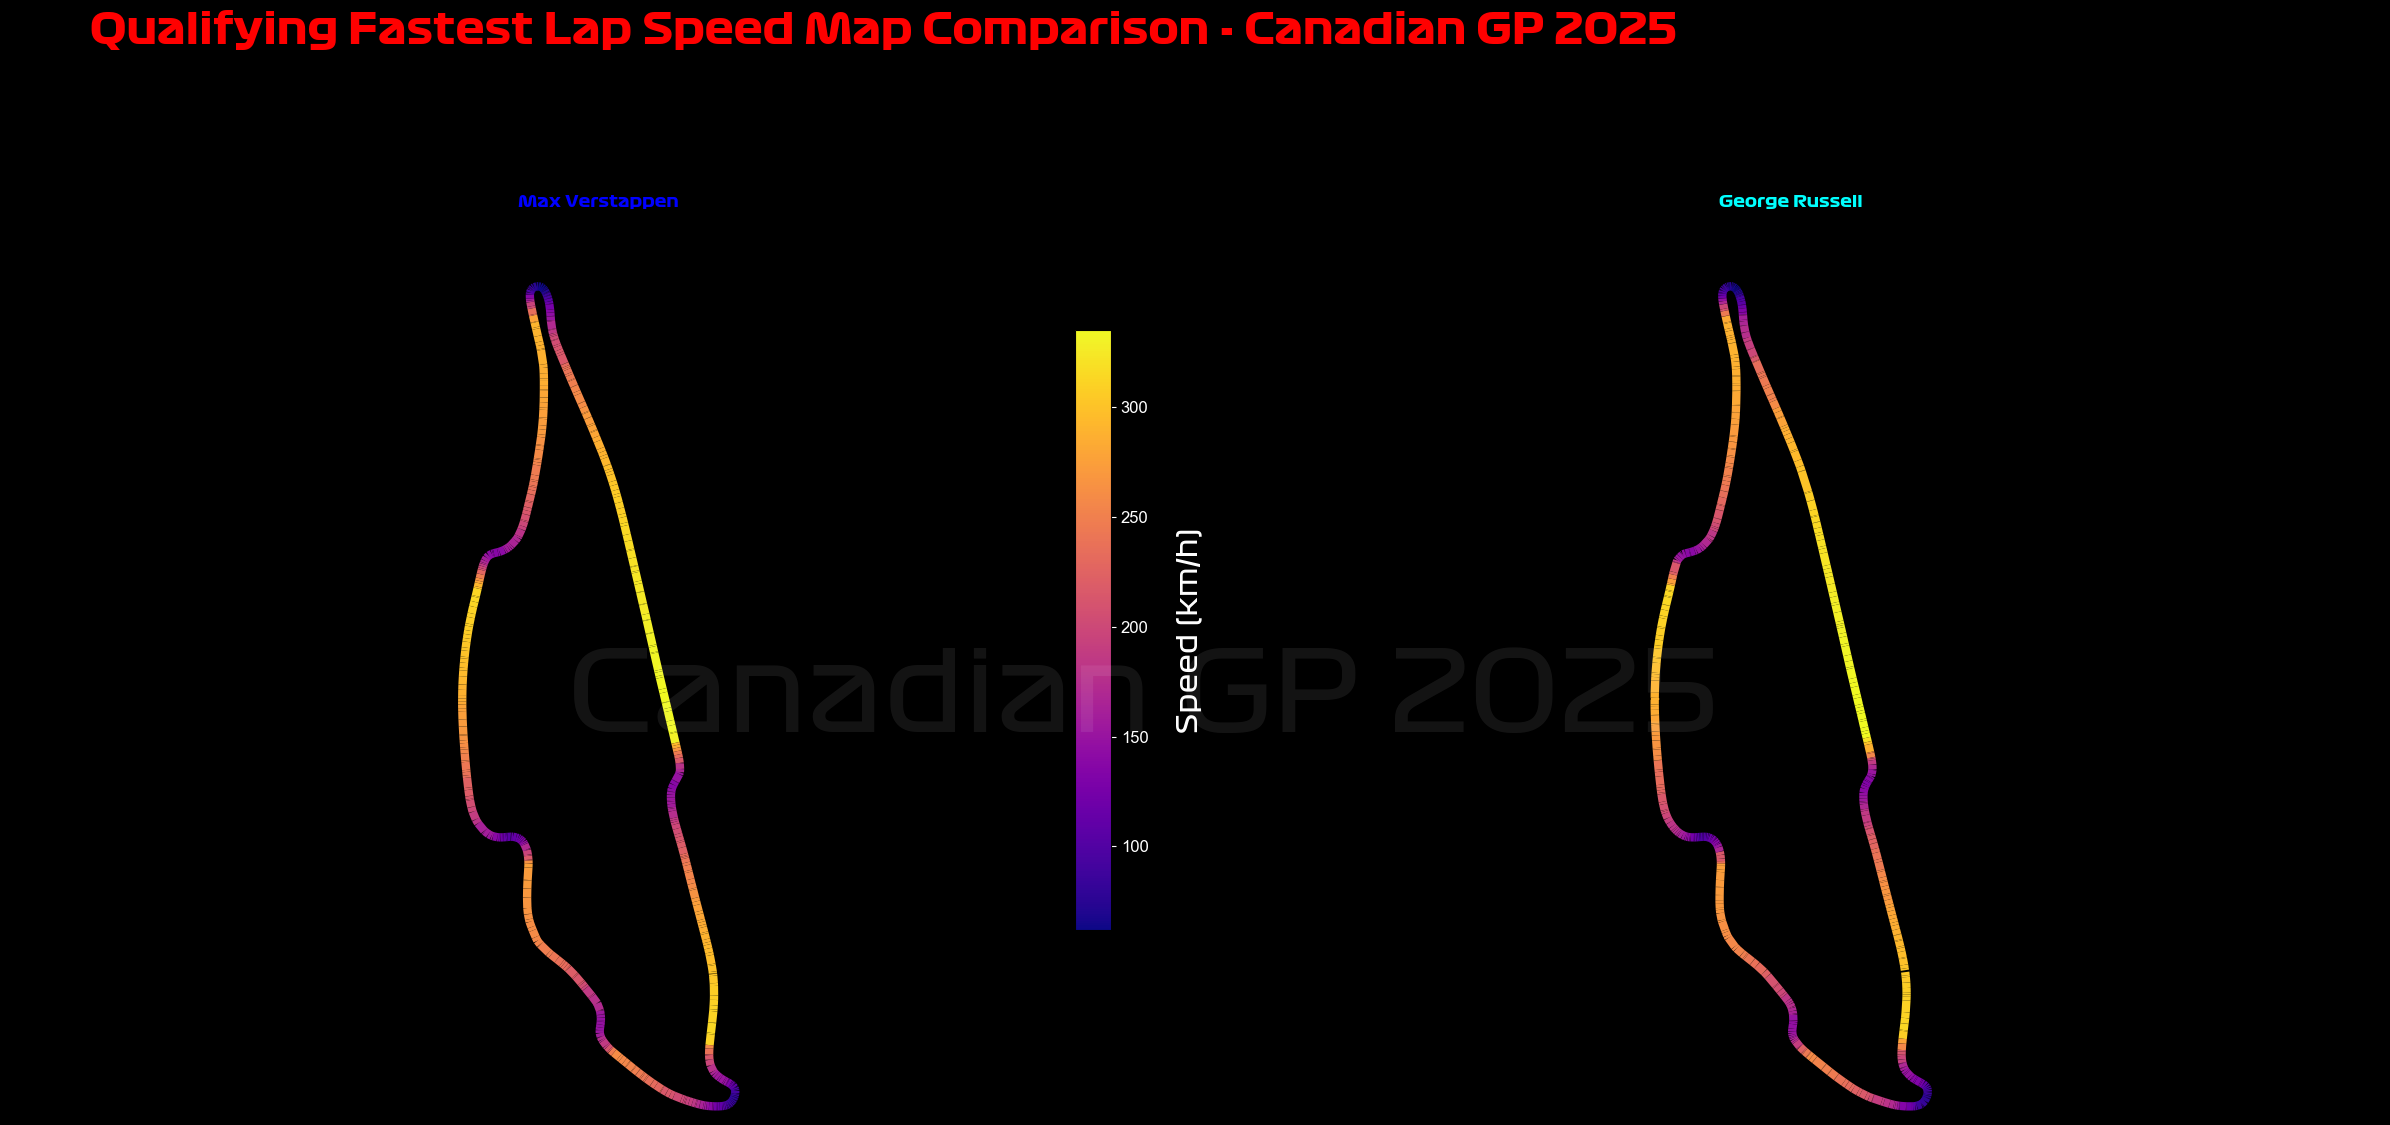

In [17]:
ver = quali_session.laps.pick_driver('VER')   # Datframe contains qualifying data of Max Verstappen 
rus = quali_session.laps.pick_driver('RUS')   # Dataframe contains qualifying data of George Russell

ver_fastest_lap = ver.pick_fastest()
rus_fastest_lap = rus.pick_fastest()

# Extract telemetry for that lap and add distance
ver_telemetry = ver_fastest_lap.get_telemetry().add_distance()
rus_telemetry = rus_fastest_lap.get_telemetry().add_distance()

# Verstappen Telemetry
x_ver = ver_telemetry['X'].values              # Creates an array of x co-ordinates
y_ver = ver_telemetry['Y'].values
speed_ver = ver_telemetry['Speed'].values

points_ver = np.array([x_ver, y_ver]).T.reshape(-1, 1, 2)
segments_ver = np.concatenate([points_ver[:-1], points_ver[1:]], axis=1)

lc_ver = LineCollection(segments_ver, cmap='plasma', norm=plt.Normalize(speed_ver.min(), speed_ver.max()))
lc_ver.set_array(speed_ver)
lc_ver.set_linewidth(6)

# Russell Telemetry
x_rus = rus_telemetry['X'].values              # Creates an array of x co-ordinates
y_rus = rus_telemetry['Y'].values
speed_rus = rus_telemetry['Speed'].values

points_rus = np.array([x_rus, y_rus]).T.reshape((-1, 1, 2))
segments_rus = np.concatenate([points_rus[:-1], points_rus[1:]], axis=1)

lc_rus = LineCollection(segments_rus, cmap='plasma', norm=plt.Normalize(speed_rus.min(), speed_rus.max()))
lc_rus.set_array(speed_rus)
lc_rus.set_linewidth(6)

# Plotting Both the drivers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), facecolor='black')
ax1.add_collection(lc_ver)
ax2.add_collection(lc_rus)

# Setting with the x and y parameters
ax1.set_xlim(x_ver.min(), x_ver.max())
ax1.set_ylim(y_ver.min() - 200, y_ver.max() + 100)

ax2.set_xlim(x_rus.min(), x_rus.max())
ax2.set_ylim(y_rus.min() - 200, y_rus.max() + 100)

# Customize Each Axis
fig.patch.set_facecolor("black")
for ax in [ax1, ax2]:
    ax.set_facecolor("black")
    ax.axis('off')
    ax.set_aspect('equal', adjustable='datalim')

# Adding Text
fig.text(
    -0.05, 0.5, 'Canadian GP 2025',
    transform=plt.gca().transAxes,
    fontsize=80,
    color='white',
    alpha=0.08,
    ha='center',
    va='center',
    fontproperties=font
)

ax1.set_title("Max Verstappen",y = 1.08, color='blue', fontproperties=font_bold)
ax2.set_title("George Russell", y = 1.08, color='cyan', fontproperties=font_bold)

fig.suptitle(
    "Qualifying Fastest Lap Speed Map Comparison - Canadian GP 2025",  # Main title text
    fontsize=30,                                # Big font size
    color='red',                              # Color of the title
    fontproperties=font_bold,                   # Optional: your custom font
    y = 1.12 ,                                 # Position on the vertical axis (0 = bottom, 1 = top)
    x = 0.37
)
# Add shared colorbar
cbar_ax = fig.add_axes([0.45, 0.2, 0.015, 0.6])
cbar = fig.colorbar(lc_ver, ax=[ax1, ax2], orientation='vertical', pad=0.01, aspect=30, shrink=0.1 , cax=cbar_ax)
cbar.set_label("Speed (km/h)", color='white', fontsize=20, labelpad=20,  fontproperties=font)
cbar.ax.yaxis.set_tick_params(color='white', labelsize=12)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# F1 Image Box
# img = mpimg.imread(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\PROJECTS\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\PNG\pngwing.com.png")
# ax.imshow(img, extent=[0, 1, 0, 1], aspect='auto')
# imagebox = OffsetImage(img, zoom=0.25)
# ab = AnnotationBbox(imagebox, (30, 1.5), frameon=False, xycoords='axes fraction')  # To adjust the image position
# plt.gca().add_artist(ab)

plt.tight_layout()
ax.set_aspect('equal', adjustable='datalim')
ax.margins(0.05)
plt.show()

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


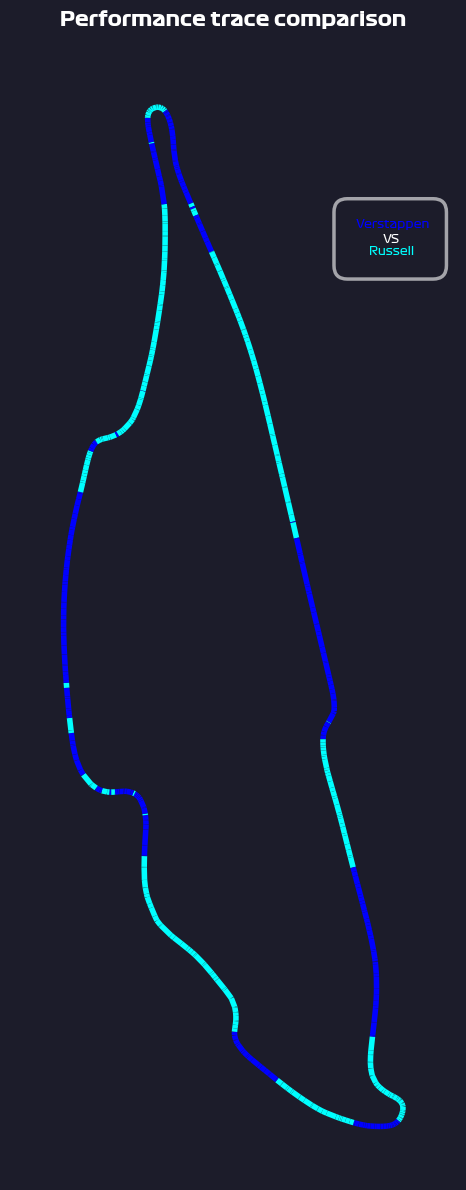

(np.float64(-3449.7071354759273), np.float64(4888.0)) (np.float64(-3273.1811407700693), np.float64(17760.0))


In [18]:
ver = quali_session.laps.pick_driver('VER')   # Datframe contains qualifying data of Max Verstappen 
rus = quali_session.laps.pick_driver('RUS')   # Dataframe contains qualifying data of George Russell

ver_fastest_lap = ver.pick_fastest()
rus_fastest_lap = rus.pick_fastest()

# Extract telemetry for that lap and add distance
ver_telemetry = ver_fastest_lap.get_telemetry().add_distance()
rus_telemetry = rus_fastest_lap.get_telemetry().add_distance()

# Verstappen Telemetry
x_ver = ver_telemetry['X'].values              # Creates an array of x co-ordinates
y_ver = ver_telemetry['Y'].values
speed_ver = ver_telemetry['Speed'].values

min_len = min(len(ver_telemetry), len(rus_telemetry))
x = ver_telemetry['X'].values[:min_len]
y = ver_telemetry['Y'].values[:min_len]

ver_speed = ver_telemetry['Speed'].values[:min_len]
rus_speed = rus_telemetry['Speed'].values[:min_len]

colors = ['blue' if v > r else 'cyan' for v, r in zip(ver_speed, rus_speed)]

# Step 1: Build segments from (x, y) points
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Step 2: Build line collection using the color list
lc = LineCollection(segments, colors=colors, linewidth=4)

# Step 3: Plot the track
fig, ax = plt.subplots(figsize=(15, 12))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1C1C2A')

ax.add_collection(lc)
ax.set_xlim(x.min() - 1000, x.max() + 1000)
ax.set_ylim(y.min() - 1000, y.max() + 1000)
ax.set_aspect('equal')
ax.axis("off")

# Adding Text
ax.text(
    3000 , 14500,
    "Verstappen",
    color = 'blue',
    fontproperties=font,
    fontsize=8
)
ax.text(
    3500, 14230,
    "VS",
    color = 'white',
    fontproperties=font,
    fontsize=8
)
ax.text(
    3250 , 14000,
    "Russell",
    color = 'cyan',
    fontproperties=font,
    fontsize=8
)
# Drawing Box Around Driver Name 
box_x = 2850      # Adjust to fit your text layout
box_y = 13800
box_width = 1600   # Increase if text overlaps
box_height = 1000

# Draw the bounding box
box = FancyBboxPatch(
    (box_x, box_y),
    box_width,
    box_height,
    boxstyle="round,pad=250",
    linewidth=2.5,
    edgecolor='white',
    facecolor='#1C1C2A',
    alpha=0.6
)

ax.add_patch(box)
ax.set_title("Performance trace comparison", color="#FFFFFF", fontproperties=font_bold, pad=20, fontsize=14)

plt.tight_layout()
plt.show()

print(ax.get_xlim(), ax.get_ylim())  # Check bounds

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


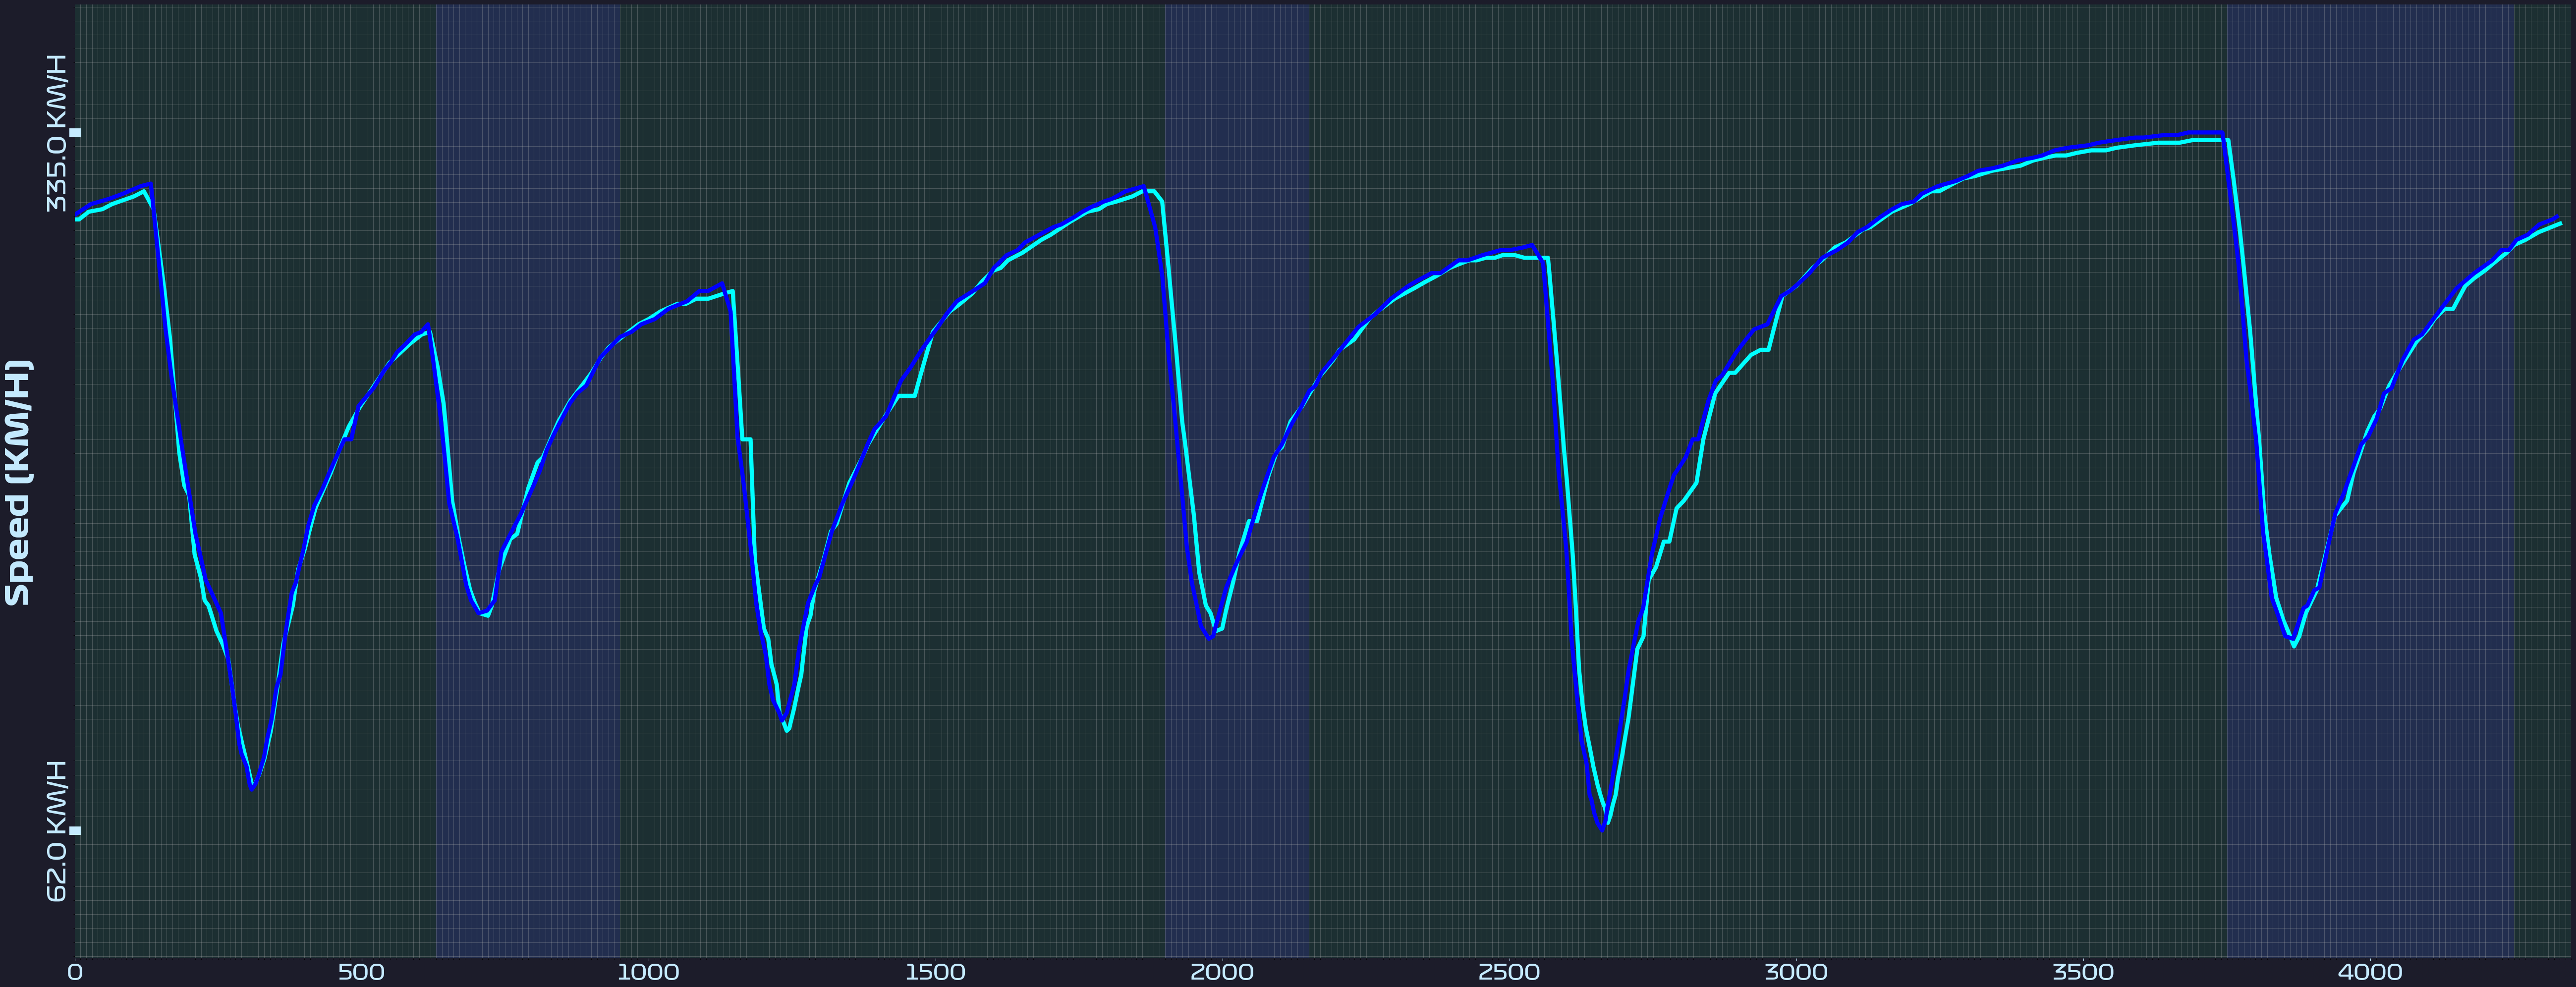

In [19]:
ver_lap = quali_session.laps.pick_driver('VER').pick_fastest()
ver_telemetry = ver_lap.get_telemetry()
ver_speed = ver_telemetry['Speed']

rus_lap = quali_session.laps.pick_driver('RUS').pick_fastest()
rus_telemetry = rus_lap.get_telemetry()
rus_speed = rus_telemetry['Speed']

fig,ax = plt.subplots(figsize=(65, 25))

fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

# Make axis disapear
for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_speed, color='cyan', label='Russell', linewidth=6)
ax.plot(ver_telemetry['Distance'], ver_speed, color='blue', label='Verstappen', linewidth=6)

# Fix X-Axis
ax.set_xlim(0, 4350)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 100)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(30)

# Fix Y-Axis
ax.set_yticks([
    min(rus_speed.min(), ver_speed.min())  ,
    max(rus_speed.max(), ver_speed.max())
])

ax.set_yticklabels(
    [f"{min(rus_speed.min(), ver_speed.min())} KM/H",
    f"{max(rus_speed.max(), ver_speed.max())} KM/H"],  
    color = "#C5EBFF", fontproperties=font, fontsize=35, rotation=90, va = 'center', ha = 'center'
    )
ax.set_ylabel("Speed (KM/H)", color="#C5EBFF", fontproperties=font_bold, fontsize=45, rotation=90, ha = 'center', labelpad=20)
ax.yaxis.set_tick_params(pad=20)  # Increase the gap (default is 4 or so)
ax.set_ylim(
    min(rus_speed.min(), ver_speed.min()) - 50,
    max(rus_speed.max(), ver_speed.max()) + 50
)
# Adding Text
position = [(0, 335), (0,62)]
for x,y in position:
    ax.text(x, y, "-", color = "#C5EBFF", fontproperties=font_bold, fontsize=70, va = 'center', ha = 'center')


ax.axvspan(1900, 2150, facecolor="#2D2D7C", alpha=0.4)
ax.axvspan(3750, 4250, facecolor="#2D2D7C", alpha=0.4)
ax.axvspan(630, 950, facecolor="#2D2D7C", alpha=0.4)

# Adding Grid
ax.yaxis.set_minor_locator(AutoMinorLocator(50))
ax.xaxis.set_minor_locator(AutoMinorLocator(50))    
ax.grid(True, which = 'minor', linestyle = '-', alpha=0.3)

plt.show()

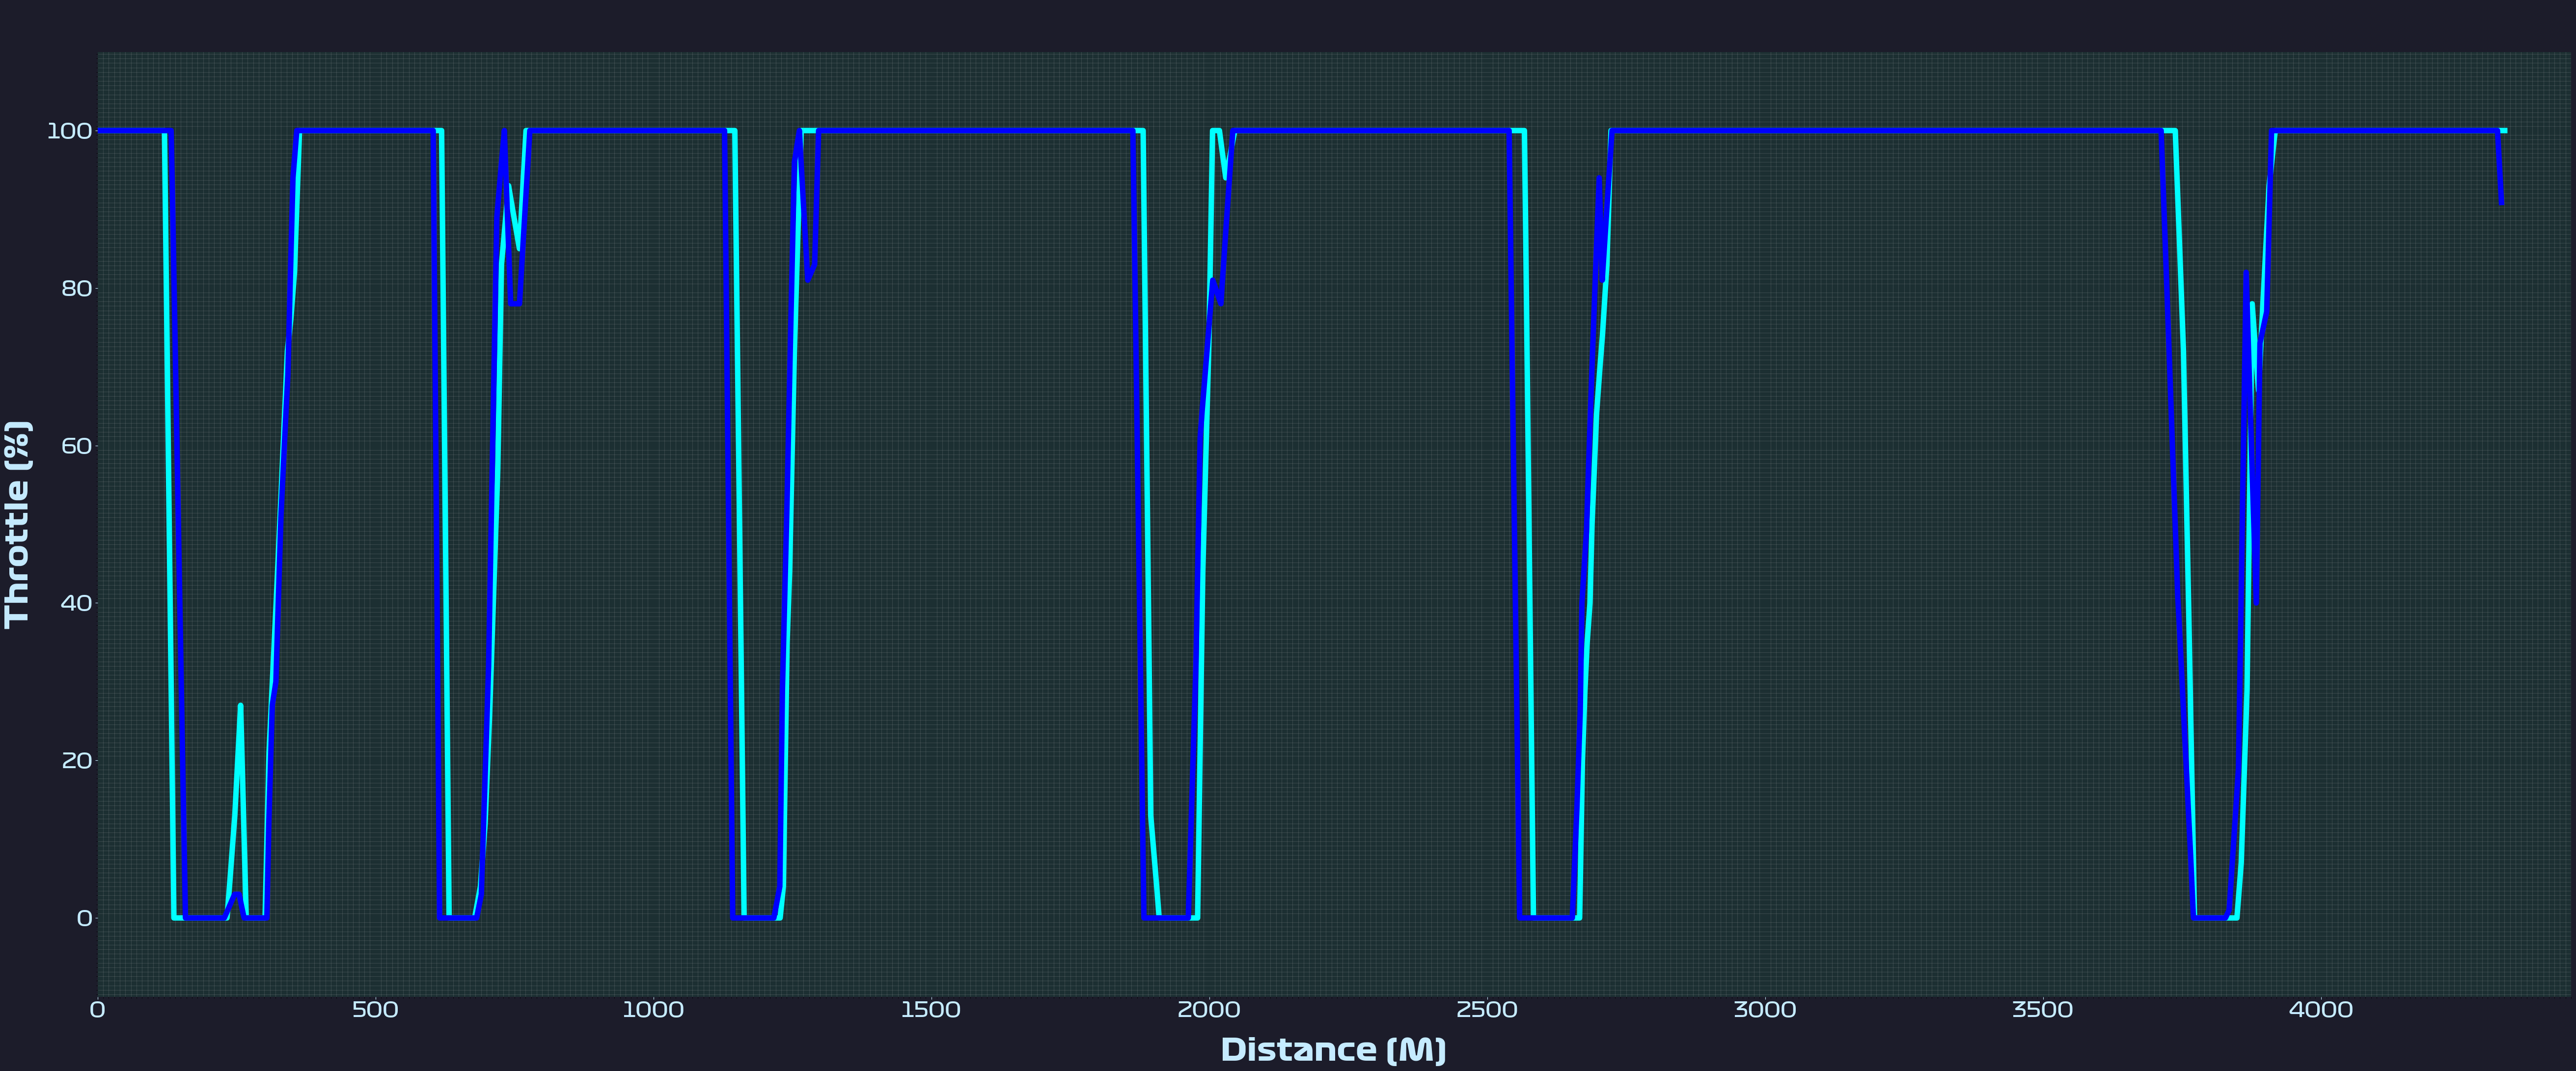

(np.float64(0.0), np.float64(4450.0))


In [20]:
ver_throttle = ver_telemetry['Throttle']
rus_throttle = rus_telemetry['Throttle']

fig, ax = plt.subplots(figsize=(65, 25))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_throttle, color='cyan', linewidth=8)
ax.plot(ver_telemetry['Distance'], ver_throttle, color='blue', linewidth=8)

# Fix X-Axis
ax.set_xlim(0, 4450)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 100)
ax.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=45, labelpad=25)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(30)

    
# Fix Y-Axis
ax.set_ylim(-10, 110)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.tick_params(axis='y', colors='#C5EBFF', labelsize = 100)
ax.set_ylabel("Throttle (%)", color="#C5EBFF", fontproperties=font_bold, fontsize=45, labelpad=20)
for label in ax.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(30)

# Adding Grid 
ax.yaxis.set_minor_locator(AutoMinorLocator(35))
ax.xaxis.set_minor_locator(AutoMinorLocator(50))

plt.grid(True, which = 'minor', linestyle='-', alpha=0.2)
plt.title(' ', fontsize = 40, color = 'r', pad=40)
plt.show()
print(ax.get_xlim())


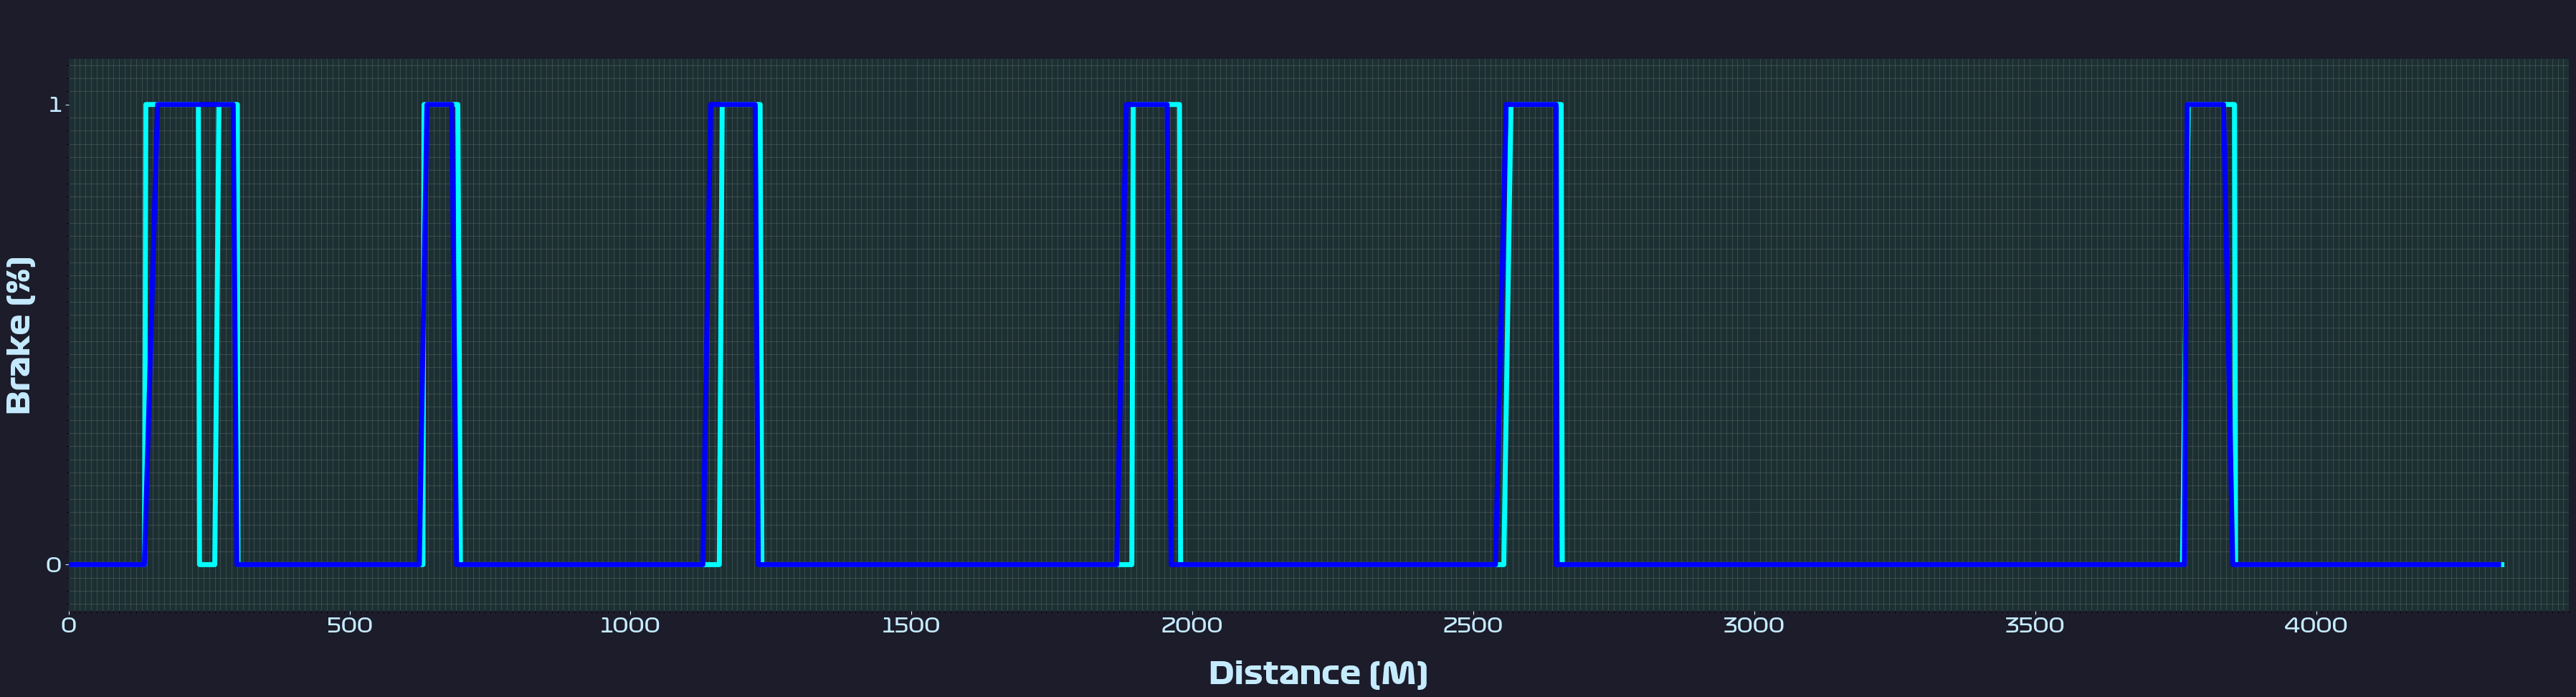

In [21]:
ver_brake = ver_telemetry['Brake']
rus_brake = rus_telemetry['Brake']

fig, ax = plt.subplots(figsize=(45, 10))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_brake, color='cyan', linewidth=5)
ax.plot(ver_telemetry['Distance'], ver_brake, color='blue', linewidth=5)

# Fix X-Axis
ax.set_xlim(0, 4450)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 80)
ax.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=25)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

    
# Fix Y-Axis
ax.set_ylim(-0.1, 1.1)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(axis='y', colors='#C5EBFF', labelsize = 80)
ax.set_ylabel("Brake (%)", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=10)
for label in ax.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

# Adding Grid    
ax.yaxis.set_minor_locator(AutoMinorLocator(35))
ax.xaxis.set_minor_locator(AutoMinorLocator(50))

plt.grid(True, which = 'minor', linestyle='-', alpha=0.2)
plt.title(' ', fontsize = 30, color = 'r', pad=30)
plt.show()

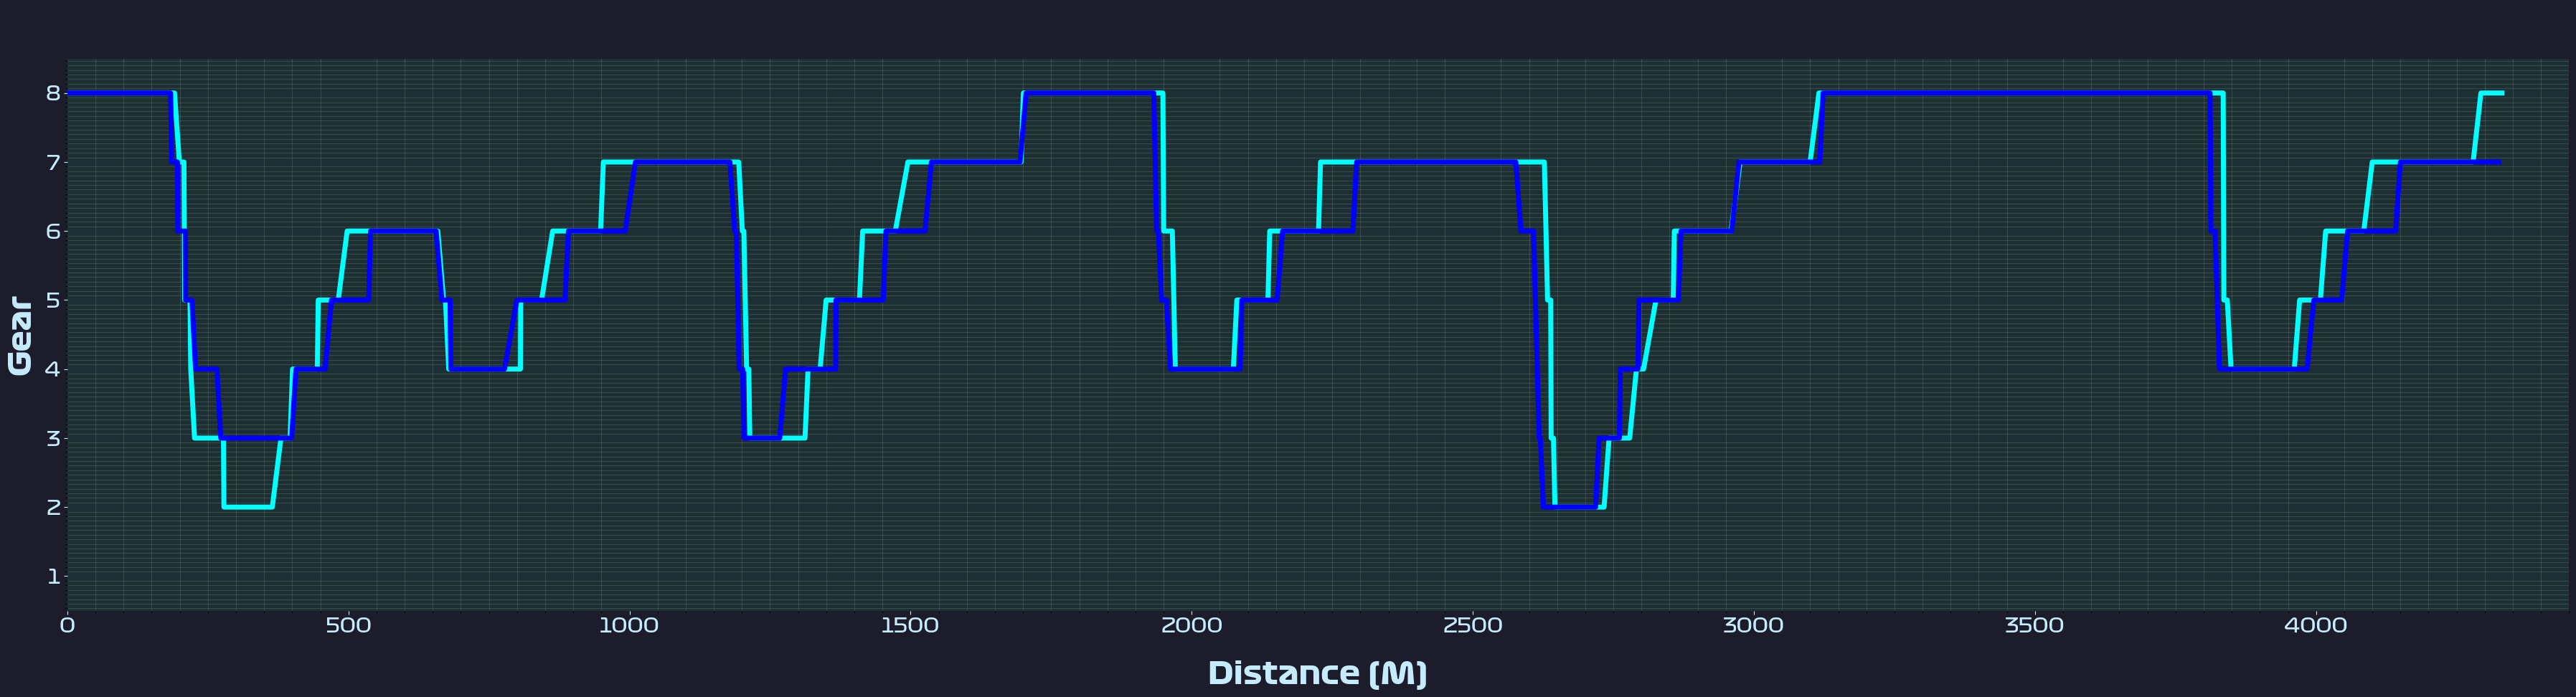

In [22]:
ver_gear = ver_telemetry['nGear']
rus_gear = rus_telemetry['nGear']

fig, ax = plt.subplots(figsize=(45, 10))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_gear, color='cyan', linewidth=5)
ax.plot(ver_telemetry['Distance'], ver_gear, color='blue', linewidth=5)

# Fix X-Axis
ax.set_xlim(0, 4450)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 80)
ax.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=25)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

    
# Fix Y-Axis
ax.set_ylim(0.5, 8.5)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(axis='y', colors='#C5EBFF', labelsize = 80)
ax.set_ylabel("Gear", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=10)
for label in ax.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

# Adding Grid    
ax.yaxis.set_minor_locator(AutoMinorLocator(15))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(True, which = 'minor', linestyle='-', alpha=0.2)
plt.title(' ', fontsize = 30, color = 'r', pad=30)
plt.show()

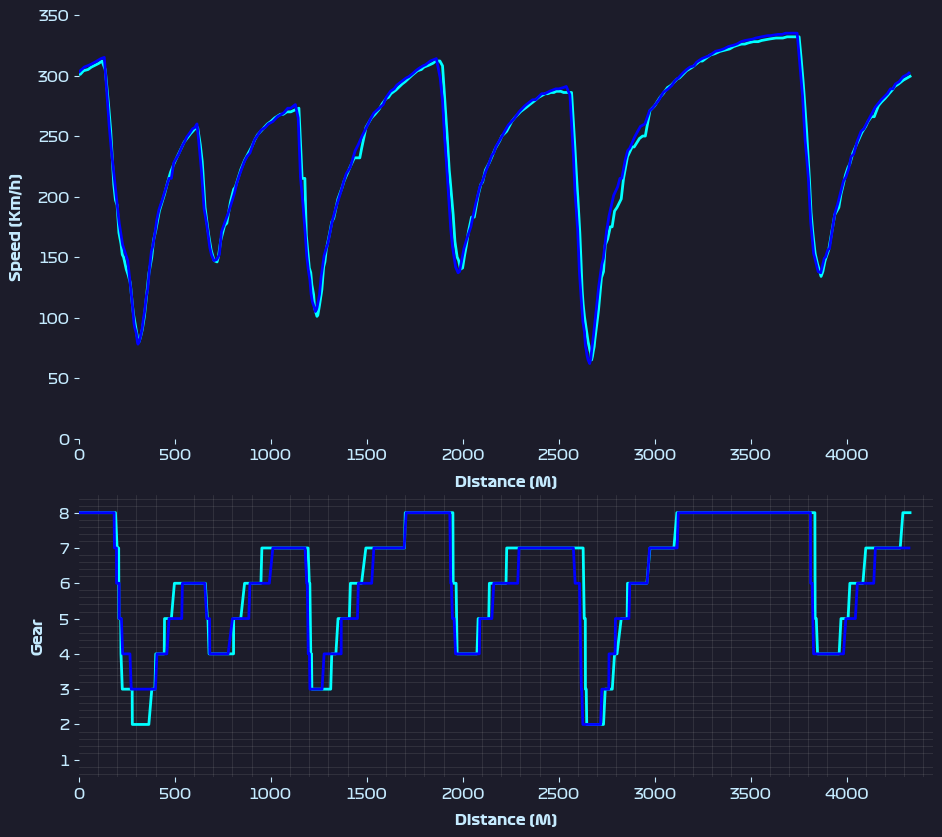

In [23]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib import gridspec

fig = plt.figure(figsize=(22, 12), facecolor='#1C1C2A')

# 3 rows × 3 columns grid
gs = gridspec.GridSpec(3, 3, height_ratios=[3, 2, 1])
gs.update(left=0.35, bottom=0.15, right=0.95, top=0.95, hspace=0.2)

# Plotting areas on the right side only
ax0 = fig.add_subplot(gs[0, 1:])  # Top row, columns 1 & 2
ax1 = fig.add_subplot(gs[1, 1:], sharex=ax0)  # Mid row, columns 1 & 2
# ax2 is free for future use (bottom-right space)

# Set background
for ax in [ax0, ax1]:
    ax.set_facecolor('#1C1C2A')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', which='minor', length=0)

# --- Plot SPEED ---
ax0.plot(rus_telemetry['Distance'], rus_speed, color='cyan', linewidth=2)
ax0.plot(ver_telemetry['Distance'], ver_speed, color='blue', linewidth=2)

ax0.set_xlim(0, 4450)
ax0.xaxis.set_major_locator(MultipleLocator(500))
ax0.set_ylim(0, 350)
ax0.yaxis.set_major_locator(MultipleLocator(50))

ax0.set_ylabel("Speed (Km/h)", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)
ax0.tick_params(axis='x', colors='#C5EBFF', labelsize=50, labelbottom=True)
ax0.tick_params(axis='y', colors='#C5EBFF', labelsize=50)
ax0.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)

for label in ax0.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

for label in ax0.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

# --- Plot GEAR ---
ax1.plot(rus_telemetry['Distance'], rus_gear, color='cyan', linewidth=2)
ax1.plot(ver_telemetry['Distance'], ver_gear, color='blue', linewidth=2)

ax1.set_xlim(0, 4450)
ax1.set_ylim(0.5, 8.5)
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax1.set_ylabel("Gear", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)
ax1.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)
ax1.tick_params(axis='x', colors='#C5EBFF', labelsize=50)
ax1.tick_params(axis='y', colors='#C5EBFF', labelsize=50)

for label in ax1.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

for label in ax1.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

# Add minor gridlines
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.grid(True, which='minor', linestyle='-', alpha=0.2, linewidth=0.5)

# Optional placeholder title
plt.title(' ', fontsize=30, color='r', pad=30)
plt.show()